In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
autos_data = pd.read_csv('data/autos.csv')
autos_data.head(2)


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500


In [17]:
X = autos_data.copy()
y = X.pop('price')

#encoding categorical data
for col in X.select_dtypes('object'):
    X[col], _ = X[col].factorize()

discrete_features = X.dtypes == int

In [25]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    discrete_columns = X.columns[discrete_features]
    mi_scores = mutual_info_regression(X[discrete_columns], y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=discrete_columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3] 

curb_weight     0.824799
engine_size     0.536743
drive_wheels    0.327228
aspiration      0.087994
body_style      0.057055
make            0.035577
Name: MI Scores, dtype: float64

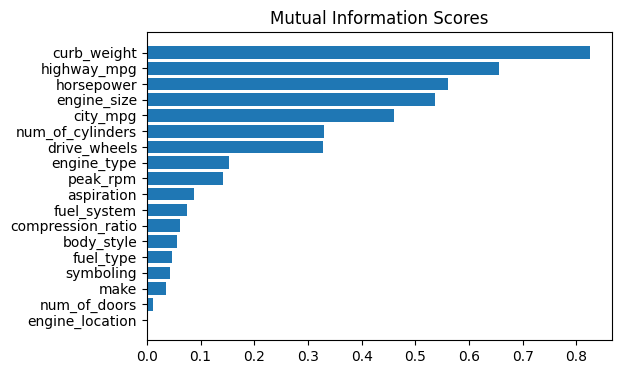

In [26]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title('Mutual Information Scores')

plt.figure(dpi=100, figsize=(6,4))
plot_mi_scores(mi_scores)

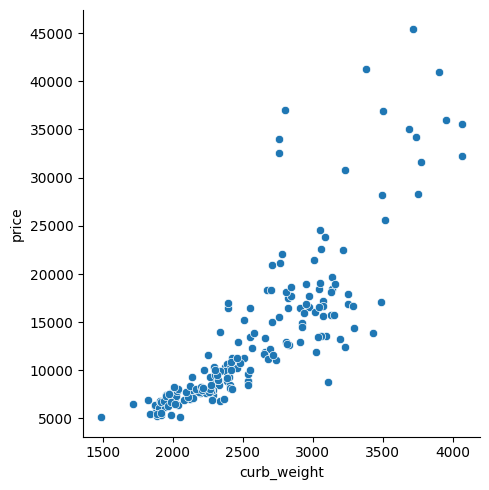

In [27]:
sns.relplot(x='curb_weight', y='price', data=autos_data)

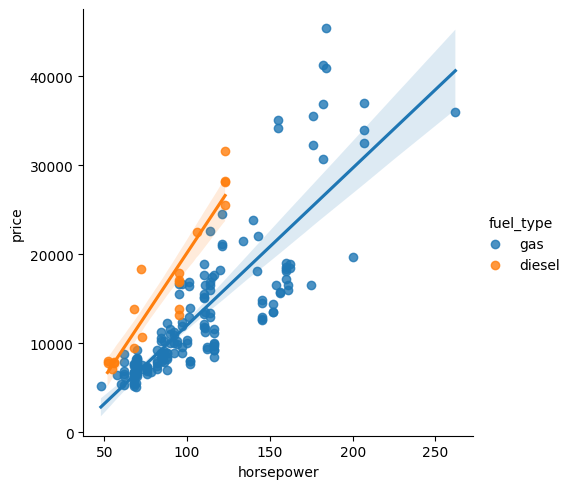

In [29]:
sns.lmplot(x='horsepower', y='price', hue='fuel_type', data=autos_data)

**Exercises**

In [30]:
#dataset ames will be used for this exercise
ames_data = pd.read_csv('data/ames.csv')
ames_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000


In [31]:
ames_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        2930 non-null   object 
 1   MSZoning          2930 non-null   object 
 2   LotFrontage       2930 non-null   float64
 3   LotArea           2930 non-null   float64
 4   Street            2930 non-null   object 
 5   Alley             2930 non-null   object 
 6   LotShape          2930 non-null   object 
 7   LandContour       2930 non-null   object 
 8   Utilities         2930 non-null   object 
 9   LotConfig         2930 non-null   object 
 10  LandSlope         2930 non-null   object 
 11  Neighborhood      2930 non-null   object 
 12  Condition1        2930 non-null   object 
 13  Condition2        2930 non-null   object 
 14  BldgType          2930 non-null   object 
 15  HouseStyle        2930 non-null   object 
 16  OverallQual       2930 non-null   object 


In [37]:
#utility function from tutorial
def make_mi_scores(X,y):
    X = X.copy()
    for x in X.select_dtypes['object', 'category']:
        X[x], _ = X[x].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X,y,discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    

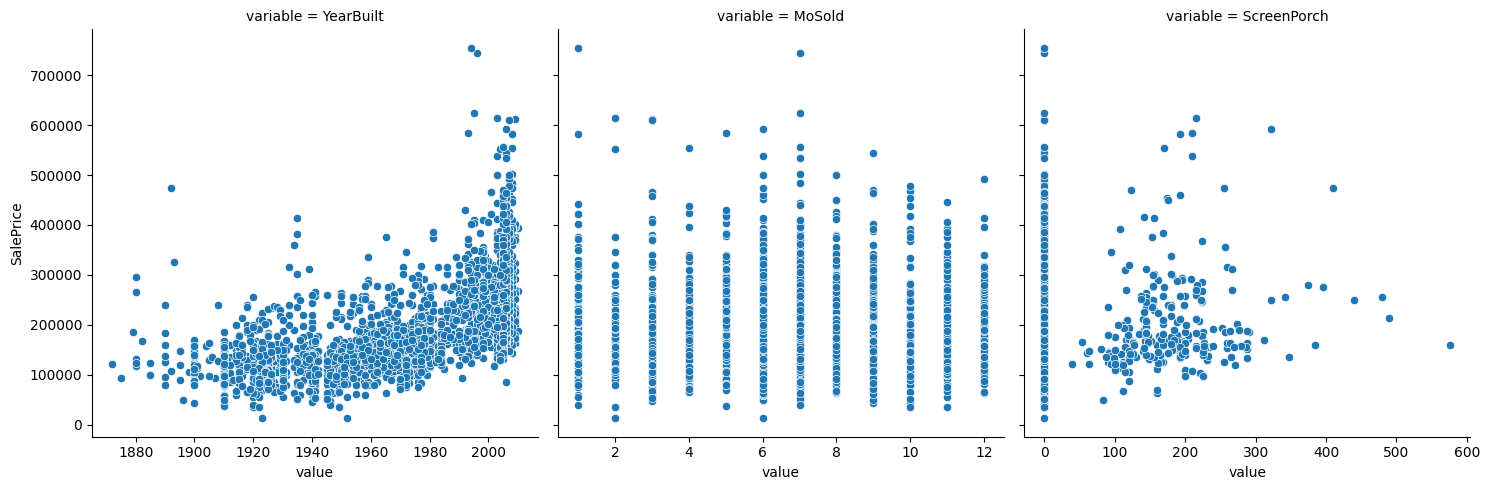

In [33]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=ames_data.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

In [38]:
X = ames_data.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X,y)

TypeError: 'method' object is not subscriptable